### Python code for Advanced Statistics, homework 1, due Sun 12 Jan 23:59
#### Yoni Schirris, 12211508

### Question 3: Illustrate the validity of the Central Limit Theorem


##### a) Plot the PMF of the Poisson distribution for $\lambda = 1000$ together with the PDF of the normal distribution with the same mean and variance (over the range $700-1300$) \[in both linear and log-log scale\]. 

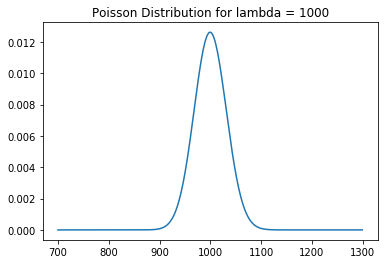

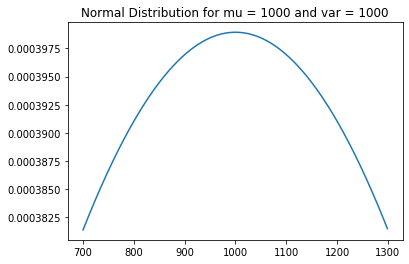

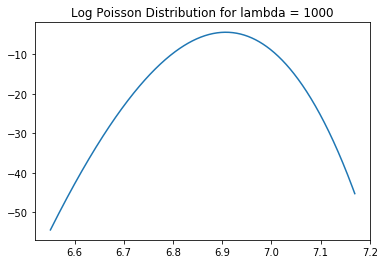

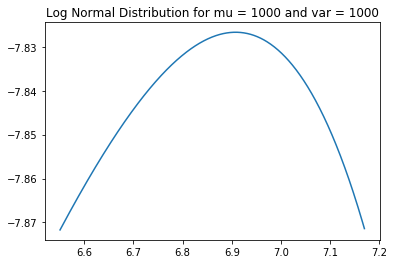

In [1]:
import math
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

LAMBDA = 1000


# mean is LAMBDA
gauss_mu = LAMBDA
# variance is LAMBDA
gauss_var = LAMBDA

ks = [i for i in range(700,1300)]
pois = scipy.stats.poisson.pmf(ks, LAMBDA)
gauss = scipy.stats.norm.pdf(ks,gauss_mu,gauss_var)

ks_log = [math.log(el) for el in ks]
pois_log = [math.log(el) for el in pois]
gauss_log = [math.log(el) for el in gauss]

plt.plot(ks, pois)
plt.title(f'Poisson Distribution for lambda = {LAMBDA}')

plt.show()

plt.plot(ks, gauss)
plt.title(f'Normal Distribution for mu = {gauss_mu} and var = {gauss_var}')

plt.show()


plt.plot(ks_log, pois_log)
plt.title(f'Log Poisson Distribution for lambda = {LAMBDA}')
plt.show()

plt.plot(ks_log, gauss_log)
plt.title(f'Log Normal Distribution for mu = {gauss_mu} and var = {gauss_var}')
plt.show()





##### b) Describe with minimum 20 words similarities and differences between the functions when you plot them in linear scale and in log-log scale.

We clearly see that the mean is the same, as the peak is at 1000.

However, we see that, even though the variance is the same, the values are very differently distributed. This can be seen from several facts.
1. The peak of the Poisson distribution has a much higher probability of ~0.012, while the Gaussian's peak has a probability of 0.003975, meaning the probability mass is spead through the rest of the values
2. This can also be clearly seen from the plot, where the Poisson distribution is much more 'peaked' (it has one sharp peak at the mean, the rest of the probabilities are close to 0), and the Gaussian distrbiution is much less 'peaked' (all values in the range of \[700-1300\] have a probability of >0.0003825)

Interestingly, when plotting the log-log scale, we see that the two graphs have a very similar (maybe even identiacal) shape. It is important to note, however, that the scale of the y-axis is very different. The Poisson ranges from ~ -50 to ~ -10 while the normal distribution ranges from ~ -7.87 to ~ -7.83! Again: The Poisson has a very big difference between the probabilies at the peak and those values even close to the peak, while the normal distribution has fairly similar probabilities for the values around the peak.

##### c) Quantify your results by findings by integrating over the tail of the distribution in an appropriate range of your choice.

In [2]:
first_ks = [i for i in range(0,700)]
first_pois = scipy.stats.poisson.pmf(first_ks, LAMBDA)
first_gauss = scipy.stats.norm.pdf(first_ks,gauss_mu,gauss_var)

sum_pois = sum(first_pois)
sum_gauss = sum(first_gauss)

print(f'The Integral of the poisson distribution from 0 to 700 is {sum_pois}')
print(f'The Integral of the Gaussian distribution from 0 to 700 is {sum_gauss}')



The Integral of the poisson distribution from 0 to 700 is 4.837272987345953e-24
The Integral of the Gaussian distribution from 0 to 700 is 0.2233636047045876


From the above we can see that the integral of 0 to 700 is much higher for the Gaussian distribution than it is for the Poisson distribution. This means that the probability of values is much more widely distributed, and not as peaked around the mean as the Poisson is.

### Question 4a

In [3]:
pvalue= 1 - scipy.stats.chi2.cdf(32.1, 18)
print(f'The p-value is {pvalue}')
stdevs = scipy.stats.norm.ppf(q=1-0.021, loc=0, scale=1)
print(f'The number of standard deviations this is away is {stdevs}')
print('-----')
print(f'Question: is the above correct or is it {stdevs} * 1-{pvalue} = {stdevs * (1 - pvalue)}? Since {pvalue}*2 < 0.05 I would expect it to be more than 2 standard deviations away. So I expect the first.')



The p-value is 0.021395317690600657
The number of standard deviations this is away is 2.0335201492530506
-----
Question: is the above correct or is it 2.0335201492530506 * 1-0.021395317690600657 = 1.990012339629544? Since 0.021395317690600657*2 < 0.05 I would expect it to be more than 2 standard deviations away. So I expect the first.


### Question 4b

In [4]:
dummy = np.random.normal(10, 1, 10)


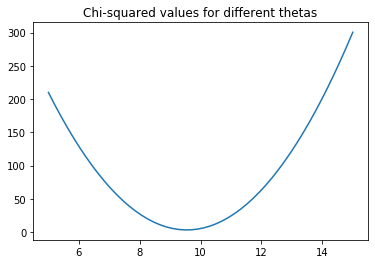

Minimum theta is 9.489795918367347
Data is [10.21373938  8.79219566  9.83984559 10.42042803  9.80347271  9.58264721
  8.50012656  9.49667232  9.67249565  9.14938151]
Chi-squared for minimum theta is 3.235119549089917


In [5]:
check_points = np.linspace(5,15,50)
chi = [np.sum((dummy - theta)**2) for theta in check_points]


plt.plot(check_points, chi)
plt.title(f'Chi-squared values for different thetas')
plt.show()

minimum_theta = check_points[np.argmin(chi)]

print(f'Minimum theta is {minimum_theta}')
# print(f'Mean of data points is {np.mean(dummy)}')
print(f'Data is {dummy}')
print(f'Chi-squared for minimum theta is {np.sum((dummy-minimum_theta)**2)}')


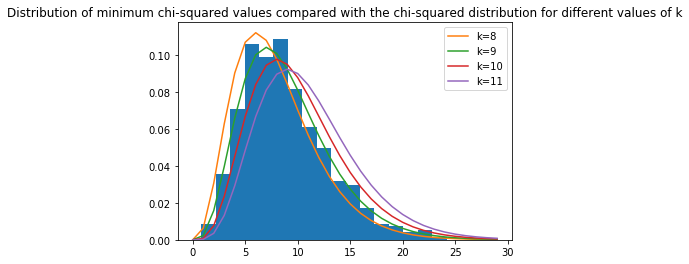

In [6]:
chis = []

for i in range(1000):
    dummy = np.random.normal(10, 1, 10)
    check_points = np.linspace(5,15,50)
    chi = [np.sum((dummy - theta)**2) for theta in check_points]
    minimum_theta = check_points[np.argmin(chi)]
    chis.append(np.sum((dummy-minimum_theta)**2))
    
    
plt.hist(chis, bins=20, density=True)
for k in range(8,12):
    plt.plot([i for i in range(30)], scipy.stats.chi2.pdf([i for i in range(30)], k), label=f'k={k}')
plt.title(f'Distribution of minimum chi-squared values compared with the chi-squared distribution for different values of k')
plt.legend()
plt.show()

Qualitatively we see that the best fitting chi-squared distribution is the distribution with 9 degrees of freedom.

We could've figured this out much quicker by using the theorem that $\chi^2_{min}$ follows a chi-squared distribution with $k-1$ degrees of freedom, and in general that $k = \text{# data points} - \text{# (free) model parameters}$, in this case $k = 10 - 1 = 9$

In [7]:
# takes about 20 seconds to run.. brute force grid search is already not the way to go here!
alt_chis = []
chis = []
_res = 50 # the search space resolution
min_theta_is = []
min_theta_js = []
for i in range(1000):
    dummy = np.random.normal(10, 1, 10)
        
    check_points_i = np.linspace(8,12,_res)     # i represents theta 1. We expect this to be in a similar range as the previous exercise
    check_points_j = np.linspace(-1,1,_res)      # j represents theta 2. We expect this to be small (we expect no linear term!)
    chi=[]
    for theta_j in check_points_j:
        for theta_i in check_points_i:
            chi.append(np.sum((dummy - (theta_i + theta_j*(dummy-4.5)))**2))
               
#     chi = [ for theta_i in check_points_i for theta_j in check_points_j]
    min_index = np.argmin(chi)
    
    min_theta_j_idx = int(min_index/_res)   # because j is in the outer loop above
    min_theta_j = check_points_j[min_theta_j_idx]   
    
    min_theta_i_idx = min_index % _res # because i is in the inner loop above
    min_theta_i = check_points_i[min_theta_i_idx]
    
    min_theta_is.append(min_theta_i)
    min_theta_js.append(min_theta_j)
    
#     min_chi = min(chi) # could've used this, but I wanted to know theta_i and theta_j
    
    min_chi_manual = np.sum((dummy - (min_theta_i + min_theta_j*(dummy-4.5)))**2)
    
    chis.append(min_chi_manual)
    
    



The best theta_1 on average is 8.00342857142857
The best theta_2 on average is 0.37999999999999995


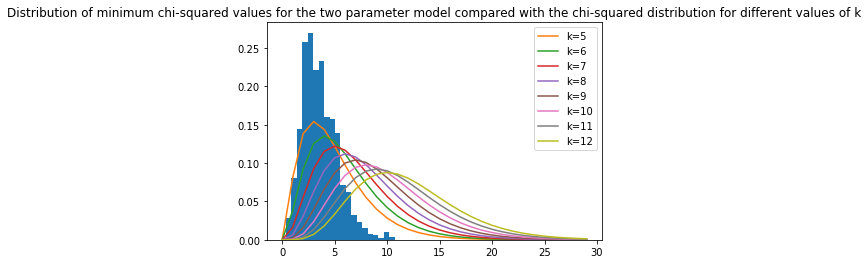

In [8]:
print(f'The best theta_1 on average is {np.mean(min_theta_is)}')
print(f'The best theta_2 on average is {np.mean(min_theta_js)}')

plt.hist(chis, bins=20, density=True)
for k in range(5,13):
    plt.plot([i for i in range(30)], scipy.stats.chi2.pdf([i for i in range(30)], k), label=f'k={k}')
plt.title(f'Distribution of minimum chi-squared values for the two parameter model compared with the chi-squared distribution for different values of k')
plt.legend()
plt.show()

I would've expected k=7, as we now have two free variables, so that we would get $k = 10-2 = 8$ and for a composite hypothesis we know $\chi^2_{min}$ follows a $\chi^2_{k-1}$ distribution.

It seems like I haven't optimized well

### Question 5 b)

In [9]:
p = 0.3**5*np.exp(-0.3) / np.math.factorial(5) # this is the significance level
print(f'The significance level is alpha = {p}')

print(f'Which is {scipy.stats.norm.ppf(1-p)} standard deviations away (or {scipy.stats.norm.ppf(1-p) * (1-p)} if we use the formula for s..?)')

The significance level is alpha = 1.5001568968804782e-05
Which is 4.173442521914998 standard deviations away (or 4.173379913729168 if we use the formula for s..?)


### Question 5 c)

In [10]:
alpha = p = 0.05

t_alpha = scipy.stats.poisson.ppf(1-p, 0.3)

print(f't_alpha is inverse cdf of the null poisson up to 1-p, and is {t_alpha}')

beta=scipy.stats.poisson.cdf(t_alpha, 5.2)

print(f'Beta is given by the integral of alternative poisson up to t_alpha is {beta}')

statistical_power = 1-beta

print(f'So the statistical power is 1 - beta = {statistical_power}')

print(f'type_1_error = alpha = {alpha}')
print(f'type_2_error = beta = {beta}')

t_alpha is inverse cdf of the null poisson up to 1-p, and is 1.0
Beta is given by the integral of alternative poisson up to t_alpha is 0.03420269940871678
So the statistical power is 1 - beta = 0.9657973005912832
type_1_error = alpha = 0.05
type_2_error = beta = 0.03420269940871678


### Question 6

### a)

To my knowledge, we do the exact same as in the optimizations above: i.e. we separately find $\chi^2_{min}$ for either model, and then we calculate the difference between those two.

In [11]:
chis = []

for i in range(1000):
    #---- same as above for 1 parameter model ---
    dummy = np.random.normal(10, 1, 10)
    check_points = np.linspace(5,15,50)
    chi_one = [np.sum((dummy - theta)**2) for theta in check_points]
    minimum_theta = check_points[np.argmin(chi_one)]
    min_chi_one = np.sum((dummy-minimum_theta)**2)
    #------ end of 1 parameter model
    
    
    #----- same as above for 2 parameter model --- (wrong, probably)
    
    check_points_i = np.linspace(8,12,_res)     # i represents theta 1. We expect this to be in a similar range as the previous exercise
    check_points_j = np.linspace(0,5,_res)      # j represents theta 2. We expect this to be small (we expect no linear term!)
    chi_two =[]
    for theta_j in check_points_j:
        for theta_i in check_points_i:
            chi_two.append(np.sum((dummy - (theta_i + theta_j*(dummy-4.5)))**2))
               
    min_index = np.argmin(chi_two)
    
    min_theta_j_idx = int(min_index/_res)   # because j is in the outer loop above
    min_theta_j = check_points_j[min_theta_j_idx]   
    
    min_theta_i_idx = min_index % _res # because i is in the inner loop above
    min_theta_i = check_points_i[min_theta_i_idx]
    
    min_theta_is.append(min_theta_i)
    min_theta_js.append(min_theta_j)
    #------ end of 2 parameter model
    
    
    #---- calculate the difference
    
    min_chi_two = np.sum((dummy - (min_theta_i + min_theta_j*(dummy-4.5)))**2)
    chis.append(min_chi_one - min_chi_two)
    
    #----- 
    

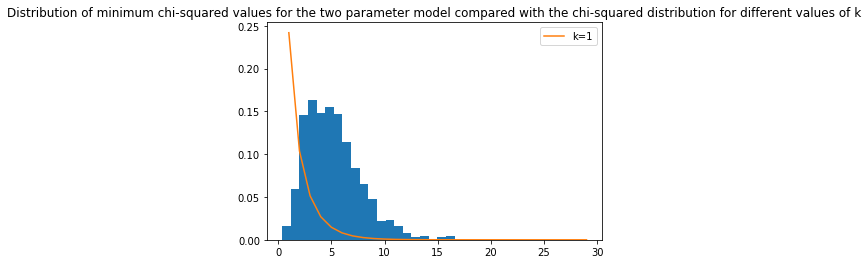

In [12]:
plt.hist(chis, bins=20, density=True)
k=1
plt.plot([i for i in range(30)], scipy.stats.chi2.pdf([i for i in range(30)], k), label=f'k={k}')
plt.title(f'Distribution of minimum chi-squared values for the two parameter model compared with the chi-squared distribution for different values of k')
plt.legend()
plt.show()

I think my optimization for the two parameter model is still wrong, which is why it doesn't work well. Let's assume it does fit the chi-squared with k=1 degrees of freedom distribution!

It is $k=1$ because this is given by the theorem of the delta chi-squared method, that mentions that the degrees of freedom is given by the difference in the number of free model parameteres: $k=d_{alt}-d_{null}=2-1=1$. And we know it should follow this distribution, as the data is indeed generated from a single parameter model, thus our null hypothesis is true.

### b)

Above we suggested to use a better process, namely a test with a null and an alternative approach. There are more ways to increase the statistical power, for example:

- Increase number of data points
- Use a higher significance lvel